In [134]:
import numpy as np
import random
from scipy.spatial.distance import euclidean
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import BallTree

# Question 1

### Random Points for the metric tree

In [2]:
def random_choice_coordinates(num_points, x_min, x_max, y_min, y_max):
    """Computes num_points random points in the space delimited by
    x_min, x_max, y_min, y_max"""
    points_in_tree = []
    while len(points_in_tree)<num_points:
        x = random.uniform(x_min, x_max)
        y = random.uniform(y_min, y_max)
        if (x, y) not in points_in_tree:
            points_in_tree.append((x,y))
    return points_in_tree

In [159]:
random.seed(42)
x_min, x_max, y_min, y_max = -5, 5, -5, 5
num_points = 9
metric_tree_points = random_choice_coordinates(num_points, x_min, x_max, y_min, y_max)
print('List of points for the metric tree: ' + str(metric_tree_points))

List of points for the metric tree: [(1.3942679845788373, -4.74989244777333), (-2.2497068163088074, -2.7678926185117723), (2.3647121416401244, 1.7669948742291126), (3.921795677048454, -4.130611673705839), (-0.7807818031472955, -4.702027805619297), (-2.8136202519639664, 0.053552881033623656), (-4.734640303161363, -3.011623493133515), (1.4988443777952316, 0.4494148060321663), (-2.795593779593033, 0.8926568387590876)]


In [4]:
def visualize_metric_tree_points(all_points):
    """Plots the random points chosen to build the metric tree"""
    x_coords = [all_points[i][0] for i in range(len(all_points))]
    y_coords = [all_points[i][1] for i in range(len(all_points))]
    plt.scatter(x_coords, y_coords)
    plt.title('Random points used to build a metric tree')
    plt.show()

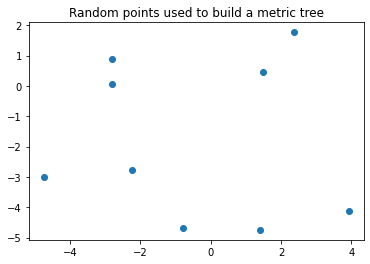

In [5]:
visualize_metric_tree_points(metric_tree_points)

### Metric

In [6]:
def distance_between_points(point1, point2):
    """Computes the euclidean distance between two points"""
    return euclidean(point1, point2)

### Choosing the pivot

In [161]:
def choice_of_pivot(all_points):
    """By approximating the median of the points, chooses a pivot that
    will divide the space in two subspaces of similar sizes"""
    matrix_points = np.array(all_points)
    min_dist = math.inf
    med = None
    x_med, y_med = np.argsort(matrix_points)[len(matrix_points)//2]
    point_med = (x_med, y_med)
    for point in all_points:
        d = distance_between_points(point, point_med)
        if d<min_dist:
            min_dist = d
            med = point
    return med

In [8]:
pivot = choice_of_pivot(metric_tree_points)
print('Choice for the pivot: ' + str(pivot))

Choice for the pivot: (1.4988443777952316, 0.4494148060321663)


### Computing the median distance $\mu$

In [9]:
def median_mu(all_points, pivot):
    distances = []
    all_points_copy = all_points.copy()
    all_points_copy.remove(pivot)
    for point in all_points_copy:
        distances.append(distance_between_points(point, pivot))
    distances_sorted = np.sort(distances)
    all_points_sorted = [x for _,x in sorted(zip(distances, all_points_copy), key=lambda pair: pair[0])]
    n = len(distances_sorted)
    if n%2 == 0:
        return (distances_sorted[int(n/2)]+distances_sorted[int(n/2)-1])/2, distances_sorted, all_points_sorted
    else:
        return distances_sorted[int(n/2)], distances_sorted, all_points_sorted

### Left and Right trees

In [10]:
def Left_Right_trees(all_points_sorted, distances_sorted, mu):
    """For a given pivot, returns the right and left trees, with
    the minimum and maximum distances to the pivot"""
    
    mu_index = len([d for d in distances_sorted if d<mu])
    Left_tree = all_points_sorted[:mu_index]
    Right_tree = all_points_sorted[mu_index:]
    min_left, max_left = distances_sorted[0], distances_sorted[mu_index-1]
    min_right, max_right = distances_sorted[mu_index], distances_sorted[-1]
    
    return Left_tree, Right_tree, (min_left, max_left), (min_right, max_right)

### Building the metric tree

In [11]:
def build_metric_tree(all_points):
    
    metric_tree = {}
    
    if len(all_points) <= 2:
        return metric_tree
    
    else:
        pivot = choice_of_pivot(all_points)
        mu, distances_sorted, all_points_sorted = median_mu(all_points, pivot)
        Left_tree, Right_tree, (min_left, max_left), (min_right, max_right) = Left_Right_trees(all_points_sorted, distances_sorted, mu)
        metric_tree[pivot] = [[Left_tree, (min_left, max_left)], [Right_tree, (min_right, max_right)]]
        metric_tree_left = build_metric_tree(Left_tree)
        metric_tree_right = build_metric_tree(Right_tree)
        metric_tree.update(metric_tree_left)
        metric_tree.update(metric_tree_right)
        
        return metric_tree   

In [12]:
metric_tree = build_metric_tree(metric_tree_points)

In [13]:
print(metric_tree)

{(1.4988443777952316, 0.4494148060321663): [[[(2.3647121416401244, 1.7669948742291126), (-2.795593779593033, 0.8926568387590876), (-2.8136202519639664, 0.053552881033623656), (-2.2497068163088074, -2.7678926185117723)], (1.5766243118053282, 4.939909221721019)], [[(3.921795677048454, -4.130611673705839), (1.3942679845788373, -4.74989244777333), (-0.7807818031472955, -4.702027805619297), (-4.734640303161363, -3.011623493133515)], (5.181441455198947, 7.12987499020931)]], (2.3647121416401244, 1.7669948742291126): [[[(-2.795593779593033, 0.8926568387590876)], (5.233853666370848, 5.233853666370848)], [[(-2.8136202519639664, 0.053552881033623656), (-2.2497068163088074, -2.7678926185117723)], (5.45444862866039, 6.469781054355411)]], (1.3942679845788373, -4.74989244777333): [[[(-0.7807818031472955, -4.702027805619297)], (2.175576384100551, 2.175576384100551)], [[(3.921795677048454, -4.130611673705839), (-4.734640303161363, -3.011623493133515)], (2.6022883993382475, 6.37064327663974)]]}


In [14]:
def point_to_indices(all_points):
    p2id = {}
    for ind, point in enumerate(all_points):
        p2id[point] = ind
    return p2id

In [15]:
p2id = point_to_indices(metric_tree_points)

In [16]:
def metric_tree_id(metric_tree, p2id):
    met_tree_id = {}
    for pivot in metric_tree:
        pivot_id = p2id[pivot]
        all_items = []
        for items in metric_tree[pivot]:
            item = []
            for point in items[0]:
                item.append(p2id[point])
            item.append(items[1])
            all_items.append((item))
        met_tree_id[pivot_id] = all_items
    return met_tree_id

In [17]:
print(metric_tree_id(metric_tree, p2id))

{7: [[2, 8, 5, 1, (1.5766243118053282, 4.939909221721019)], [3, 0, 4, 6, (5.181441455198947, 7.12987499020931)]], 2: [[8, (5.233853666370848, 5.233853666370848)], [5, 1, (5.45444862866039, 6.469781054355411)]], 0: [[4, (2.175576384100551, 2.175576384100551)], [3, 6, (2.6022883993382475, 6.37064327663974)]]}


### Partial_tree for NN search

In [18]:
def partial_metric_tree(all_points):
    """Computes one iteration of the metric tree"""
    partial_tree = {}
    pivot = choice_of_pivot(all_points)
    mu, distances_sorted, all_points_sorted = median_mu(all_points, pivot)
    Left_tree, Right_tree, (min_left, max_left), (min_right, max_right) = Left_Right_trees(all_points_sorted, distances_sorted, mu)
    partial_tree[pivot] = [[Left_tree, (min_left, max_left)], [Right_tree, (min_right, max_right)]]
    return partial_tree

In [19]:
partial_tree = partial_metric_tree(metric_tree_points)

In [20]:
print(partial_tree)

{(1.4988443777952316, 0.4494148060321663): [[[(2.3647121416401244, 1.7669948742291126), (-2.795593779593033, 0.8926568387590876), (-2.8136202519639664, 0.053552881033623656), (-2.2497068163088074, -2.7678926185117723)], (1.5766243118053282, 4.939909221721019)], [[(3.921795677048454, -4.130611673705839), (1.3942679845788373, -4.74989244777333), (-0.7807818031472955, -4.702027805619297), (-4.734640303161363, -3.011623493133515)], (5.181441455198947, 7.12987499020931)]]}


### Exact search by visiting all points

In [36]:
def exact_nn_search(all_points, q):
    nnq = None
    d = math.inf
    for point in all_points:
        dist = distance_between_points(point,q)
        if dist < d:
            d = dist
            nnq = point
    return nnq

In [37]:
def visualize_metric_nn(all_points, nn, q):
    x_coords = [all_points[i][0] for i in range(len(all_points))]
    y_coords = [all_points[i][1] for i in range(len(all_points))]
    plt.scatter(x_coords, y_coords, c='green', label='points')
    x, y = nn
    qx, qy = q
    plt.scatter(x, y, c='blue', label='NN')
    plt.scatter(qx, qy, c='red', label='Query')
    plt.title('Visualizing the NN given a specific query')
    plt.legend()
    plt.show()

In [38]:
random.seed(42)
x_min, x_max, y_min, y_max = -5, 5, -5, 5
num_points = 10
metric_tree_points = random_choice_coordinates(num_points, x_min, x_max, y_min, y_max)
print(metric_tree_points)

[(1.3942679845788373, -4.74989244777333), (-2.2497068163088074, -2.7678926185117723), (2.3647121416401244, 1.7669948742291126), (3.921795677048454, -4.130611673705839), (-0.7807818031472955, -4.702027805619297), (-2.8136202519639664, 0.053552881033623656), (-4.734640303161363, -3.011623493133515), (1.4988443777952316, 0.4494148060321663), (-2.795593779593033, 0.8926568387590876), (3.0943045667782663, -4.93501240321939)]


(1.4988443777952316, 0.4494148060321663)


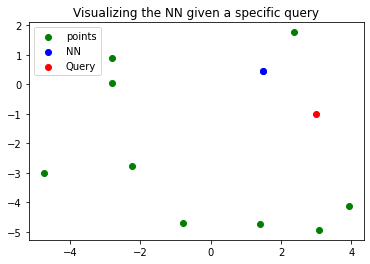

In [39]:
q = (3,-1)
# q = (0,-4) ca rend un mauvais résultat par exemple parce qu'on choisit 
# left inf middle.
# Résultats qui dépendent beaucoup du pivot
nn = exact_nn_search(metric_tree_points, q)
print(nn)
visualize_metric_nn(metric_tree_points, nn, q)

### Search with Pruning condition

In [115]:
def search_pruning_metric_tree(all_points, q, tau=math.inf, nnq=None):
    
    if len(all_points) <=2:
        
        return exact_nn_search(all_points+[nnq], q)
        
    else:
        partial_tree = partial_metric_tree(all_points)
        pivot = list(partial_tree.keys())[0]
        l = distance_between_points(pivot, q)
        print('l: '+str(l))
        
        left_tree = partial_tree[pivot][0]
        min_left, max_left = left_tree[1]
        right_tree = partial_tree[pivot][1]
        min_right, max_right = right_tree[1]
        if l<tau:
            tau = l
            nnq = pivot
        d_left = [min_left - tau, max_left + tau]
        d_right = [min_right - tau, max_right + tau]
        print('d_left: ' + str(d_left))
        print('d_right: ' + str(d_right))
        
        if (l>= d_left[0] and l<= d_left[1] and l>= d_right[0] and l<= d_right[1]):
            print('No pruning (both intervals): need to visit both sides')
            nnq1 = search_pruning_metric_tree(left_tree[0], q, tau, nnq)
            nnq2 = search_pruning_metric_tree(right_tree[0], q, tau, nnq)
            return excat_nn_search([nnq1, nnq2, nnq], q)
        elif l>= d_left[0] and l<= d_left[1]:
            print('left')
            return search_pruning_metric_tree(left_tree[0], q, tau, nnq)
        elif l>= d_right[0] and l<= d_right[1]:
            print('right')
            return search_pruning_metric_tree(left_tree[0], q, tau, nnq)
        else:
            print('No pruning (not in any interval): need to visit both sides')
            nnq1 = search_pruning_metric_tree(left_tree[0], q, tau, nnq)
            nnq2 = search_pruning_metric_tree(right_tree[0], q, tau, nnq)
            return excat_nn_search([nnq1, nnq2, nnq], q)       

In [116]:
q = (0,0)
# q = (1.4988443777952316, 0.4494148060321663) (premier pivot)
# q = (0,0)
# q = (-3,-3) 
# q = (3,-3) 
# q = (3,-1) 
# Résultats qui dépendent beaucoup du pivot. il faudrait choisir un pivot qui maximise les chances de pruning (question 5)
nn = search_pruning_metric_tree(points, q)
print(nn)

l: 1.564770953439929
d_left: [0.6212132003395401, 5.895366506777563]
d_right: [3.410706909818839, 8.694645943649238]
left
l: 2.9346517361149735
d_left: [-0.7254733866755083, 2.4040685202043495]
d_right: [4.389400904918361, 7.518942811798219]
No pruning (not in any interval): need to visit both sides
(1.4988443777952316, 0.4494148060321663)


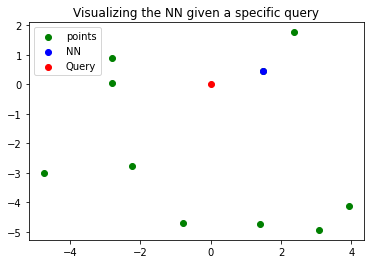

In [113]:
visualize_metric_nn(metric_tree_points, nn, q)

### Searching with defeatist style strategy

In [92]:
def defeatist_search(all_points, q, nnq=None, d=math.inf):

    if len(all_points) <=2:
        print('The nearest neighbor is: ')
        dnnq = d
        if len(all_points) == 1:
            points = [nnq, all_points[0]]
            d = distance_between_points(points[1], q)
            ind_min = [dnnq, d].index(min([dnnq, d]))
            return points[ind_min]
        else:
            points = [nnq, all_points[0], all_points[1]]
            d1, d2 = distance_between_points(points[1], q), distance_between_points(points[2], q)
            ind_min = [dnnq, d1, d2].index(min([dnnq, d1, d2]))
            return points[ind_min]
        
    else:

        partial_tree = partial_metric_tree(all_points)
        pivot = list(partial_tree.keys())[0]
        
        tau = distance_between_points(pivot, q)
        mu = median_mu(all_points, pivot)[0]
        
        if tau<d:
            d = tau
            nnq = pivot
        
        left_tree = partial_tree[pivot][0]
        min_left, max_left = left_tree[1]
        right_tree = partial_tree[pivot][1]
        min_right, max_right = right_tree[1]
        
        if tau < mu:
            print('left')
            return defeatist_search(left_tree[0], q, nnq, d)
        else:
            print('right')
            return defeatist_search(right_tree[0], q, nnq, d)        

In [93]:
# q = (-3,-4) # part du mauvais côté
# q = (0,1) # Marche!
q = (0,-3) # part du mauvais côté
nn = defeatist_search(metric_tree_points, q)
print(nn)

left
left
The nearest neighbor is: 
(1.4988443777952316, 0.4494148060321663)


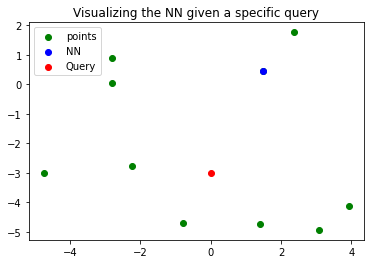

In [94]:
visualize_metric_nn(metric_tree_points, nn, q)

# Question 2

In [95]:
x_min, x_max, y_min, y_max = -5, 5, -5, 5
params = {'number_of_trees':3, 'number_of_points_in_trees':[5,7,3], 'boundaries':(x_min, x_max, y_min, y_max)}

In [96]:
def metric_forest(params):
    forest_points = []
    num_trees = params['number_of_trees']
    list_num_points = params['number_of_points_in_trees']
    x_min, x_max, y_min, y_max = params['boundaries']
    for tree in range(num_trees):
        num_points = list_num_points[tree]
        all_points = random_choice_coordinates(num_points, x_min, x_max, y_min, y_max)
        forest_points.append(all_points)
    return forest_points

In [97]:
random.seed(42)
forest_points = metric_forest(params)

In [98]:
def plot_forest_points(forest_points):
    
    for i, points in enumerate(forest_points):
        x_coords = [points[i][0] for i in range(len(points))]
        y_coords = [points[i][1] for i in range(len(points))]
        plt.scatter(x_coords, y_coords, label='tree'+str(i+1))
        
    plt.title('Random points used to build a metric tree')
    plt.legend()
    plt.show()

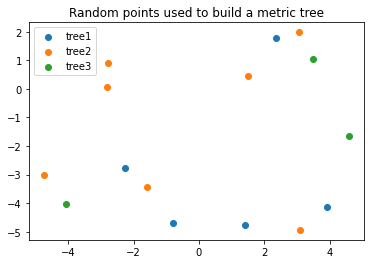

[(-2.8136202519639664, 0.053552881033623656), (-4.734640303161363, -3.011623493133515), (1.4988443777952316, 0.4494148060321663), (-2.795593779593033, 0.8926568387590876), (3.0943045667782663, -4.93501240321939), (3.058192518328079, 1.9813939498822686), (-1.5974948348200813, -3.4452050018821847)]


In [107]:
plot_forest_points(forest_points)
print(forest_points[1])

### Searching the forest with pruning

In [117]:
def searching_with_pruning(forest_points, q):
    nnqs = []
    distances_q = []
    
    for points in forest_points:
        nnq = search_pruning_metric_tree(points, q, tau=math.inf, nnq=None)
        d = distance_between_points(nnq, q)
        nnqs.append(nnq)
        distances_q.append(d)
    nnq_min_ind = distances_q.index(min(distances_q))
    nnq_min = nnqs[nnq_min_ind]
    print('the NN was found in tree ' + str(nnq_min_ind+1))
    return nnq_min

In [119]:
# q = (-5,0)
# q = (-3,-3)
# q = (0,0)
q = (0,0)
nn = searching_with_pruning(forest_points, q)
print(nn)

l: 2.9519712732972487
d_left: [3.1477231559741816, 9.42175232765266]
d_right: [3.6367753624181183, 10.14518937016373]
No pruning (not in any interval): need to visit both sides
l: 1.564770953439929
d_left: [0.6212132003395401, 5.895366506777563]
d_right: [3.410706909818839, 8.694645943649238]
left
l: 2.9346517361149735
d_left: [-0.7254733866755083, 2.4040685202043495]
d_right: [4.389400904918361, 7.518942811798219]
No pruning (not in any interval): need to visit both sides
l: 3.626450388828556
d_left: [-0.738589149713067, 6.514311627944045]
d_right: [5.465876720946169, 12.71877749860328]
left
the NN was found in tree 2
(1.4988443777952316, 0.4494148060321663)


In [120]:
def plot_forest_nn(forest_points, q, nn):
    
    for i, points in enumerate(forest_points):
        x_coords = [points[i][0] for i in range(len(points))]
        y_coords = [points[i][1] for i in range(len(points))]
        plt.scatter(x_coords, y_coords, label='tree'+str(i+1))
    x, y = nn
    qx, qy = q
    plt.scatter(x, y, c='blue', label='NN')
    plt.scatter(qx, qy, c='red', label='Query')
    plt.title('Visualizing the NN given a specific query')
    plt.legend()
    plt.show()

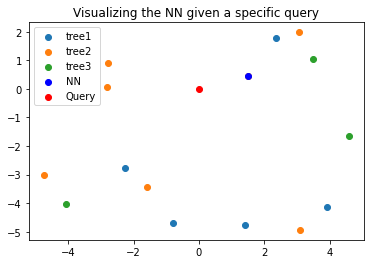

In [121]:
plot_forest_nn(forest_points, q, nn)

### Searching the forest with defeatist search

In [128]:
def searching_with_defeatist(forest_points, q):
    
    nnqs = []
    distances_q = []
    
    for points in forest_points:
        nnq = defeatist_search(points, q, nnq=None, d=math.inf)
        d = distance_between_points(nnq, q)
        nnqs.append(nnq)
        distances_q.append(d)
    nnq_min_ind = distances_q.index(min(distances_q))
    nnq_min = nnqs[nnq_min_ind]
    print('the NN was found in tree ' + str(nnq_min_ind+1))
    return nnq_min   

In [129]:
q = (3, -2)
nn = searching_with_defeatist(forest_points, q)
print(nn)

left
The nearest neighbor is: 
left
right
The nearest neighbor is: 
left
The nearest neighbor is: 
the NN was found in tree 3
(4.572130722067811, -1.6340545488737321)


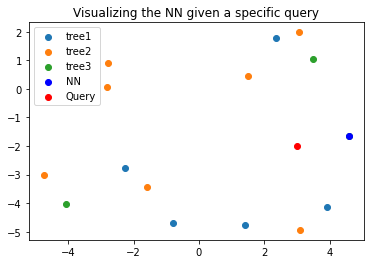

In [130]:
plot_forest_nn(forest_points, q, nn)

# Question 3

In [131]:
#trying in 3D
def random_choice_coordinates_3D(num_points, x_min, x_max, y_min, y_max, z_min, z_max):
    points_in_tree = []
    while len(points_in_tree)<num_points:
        x = random.uniform(x_min, x_max)
        y = random.uniform(y_min, y_max)
        z = random.uniform(z_min, z_max)
        if (x, y, z) not in points_in_tree:
            points_in_tree.append((x,y,z))
    return points_in_tree

In [139]:
def visualize_metric_tree_points_3D(all_points):
    """Plots the random points chosen to build the metric tree"""
    fig = plt.figure()
    ax = Axes3D(fig)
    x_coords = [all_points[i][0] for i in range(len(all_points))]
    y_coords = [all_points[i][1] for i in range(len(all_points))]
    z_coords = [all_points[i][2] for i in range(len(all_points))]
    ax.scatter(x_coords, y_coords, z_coords)
    plt.title('Random points used to build a metric tree')
    plt.show()

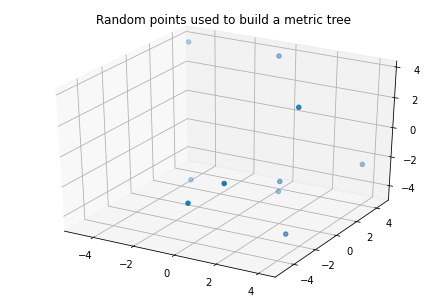

In [141]:
num_points = 10
x_min, x_max, y_min, y_max, z_min, z_max = -5, 5, -5, 5, -5, 5
all_points = random_choice_coordinates_3D(num_points, x_min, x_max, y_min, y_max, z_min, z_max)
visualize_metric_tree_points_3D(all_points)

### Search methods in 3D

In [162]:
def choice_of_pivot(all_points):
    """By approximating the median of the points, chooses a pivot that
    will divide the space in two subspaces of similar sizes"""
    matrix_points = np.array(all_points)
    min_dist = math.inf
    med = None
    x_med, y_med, z_med = np.argsort(matrix_points)[len(matrix_points)//2]
    point_med = (x_med, y_med, z_med)
    for point in all_points:
        d = distance_between_points(point, point_med)
        if d<min_dist:
            min_dist = d
            med = point
    return med

#### Pruning Method

In [148]:
q = (-4,0,0)
# q = (1.4988443777952316, 0.4494148060321663) (premier pivot)
# q = (0,0)
# q = (-3,-3) 
# q = (3,-3) 
# q = (3,-1) 
# Résultats qui dépendent beaucoup du pivot. il faudrait choisir un pivot qui maximise les chances de pruning (question 5)
nn = search_pruning_metric_tree(all_points, q)
print(nn)

l: 6.277931592525018
d_left: [-4.863531878678524, 10.568515108680245]
d_right: [-1.6861463391291363, 16.110202568495097]
No pruning (both intervals): need to visit both sides
l: 6.502781239272584
d_left: [-2.5762572615176778, 9.979605923532358]
d_right: [-2.360546611387732, 10.333894466077432]
No pruning (both intervals): need to visit both sides
l: 7.197944031620726
d_left: [-1.019030604145648, 11.899768685706093]
d_right: [1.1433447383942061, 14.727783991536546]
No pruning (both intervals): need to visit both sides
(-2.3661094924890924, 0.005861130502982981, -3.2134811946986863)


In [151]:
def visualize_metric_nn_3D(all_points, nn, q):
    fig = plt.figure()
    ax = Axes3D(fig)
    x_coords = [all_points[i][0] for i in range(len(all_points))]
    y_coords = [all_points[i][1] for i in range(len(all_points))]
    z_coords = [all_points[i][2] for i in range(len(all_points))]
    ax.scatter(x_coords, y_coords, c='green', label='points')
    x, y, z = nn
    qx, qy, qz = q
    ax.scatter(x, y, c='blue', label='NN')
    ax.scatter(qx, qy, c='red', label='Query')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.title('Visualizing the NN given a specific query')
    plt.legend()
    plt.show()

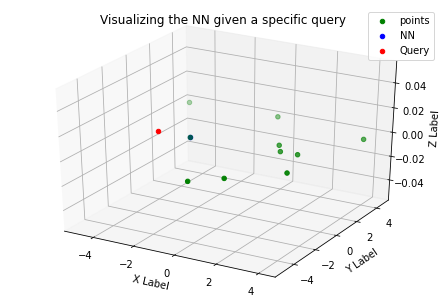

In [152]:
visualize_metric_nn_3D(all_points, nn, q)

#### Defeatist Method

In [154]:
q = (-4,0,0)
# q = (1.4988443777952316, 0.4494148060321663) (premier pivot)
# q = (0,0)
# q = (-3,-3) 
# q = (3,-3) 
# q = (3,-1) 
# Résultats qui dépendent beaucoup du pivot. il faudrait choisir un pivot qui maximise les chances de pruning (question 5)
nn = defeatist_search(all_points, q, nnq=None, d=math.inf)
print(nn)

right
right
The nearest neighbor is: 
(-4.805232576141677, 4.2909861626461705, 3.7872187782318427)


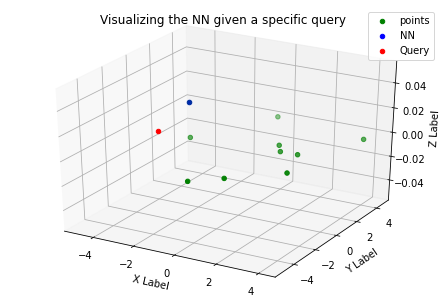

In [155]:
visualize_metric_nn_3D(all_points, nn, q)

#### Exact search

In [157]:
q = (-4,0,0)
nn = exact_nn_search(all_points, q)
print(nn)

(-2.3661094924890924, 0.005861130502982981, -3.2134811946986863)


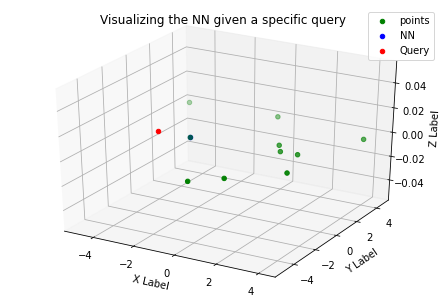

In [158]:
visualize_metric_nn_3D(all_points, nn, q)